# Project 4 Regression Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# NOTE: Install pandas first, for loading csv data
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Dataset 1

## Question 1: Load the dataset

In [2]:
# Change to your Local file direction - load data
dataset = pd.read_csv('network_backup_dataset.csv')
# NOTE: dataframe info: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
# Rename (shorter) the columns for convenience
dataset.columns = ['Week#','WeekDay','BKStime','WorkFlowID','Filename','BKsize','BKtime']
# Repalce WeekDays to numarical number
dailydata = dataset.replace(
    {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
# Assign # of days
dailydata = dailydata.assign(Days=(dailydata['Week#']-1)*7+dailydata['WeekDay'])
#print(dailydata)

### (a) plot the backup sizes for all workflows 20 days period

Text(0, 0.5, 'Backup Size (GB)')

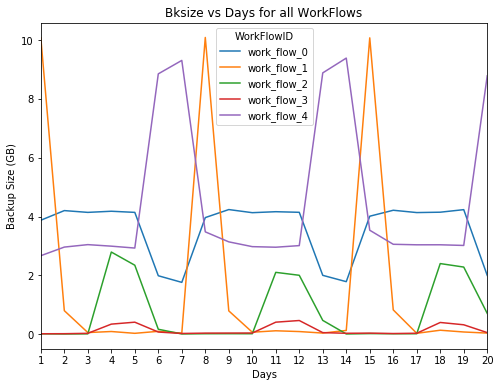

In [3]:
# NOTE: https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot
# NOTE: https://stackoverflow.com/questions/34225839/groupby-multiple-values-and-plotting-results

# Filter the data with only three columns
dailydataQ1 = dailydata.filter(items=['WorkFlowID','BKsize','Days'])
# Regroup by Days and WorkFlowID with sum of BKsize
dailydataQ1 = dailydataQ1.groupby(['Days','WorkFlowID'])['BKsize'].sum()
# Extract first 20 days
dailydata20 = dailydataQ1.loc[1:20,:]
# plot
dailydata20.unstack('WorkFlowID').plot(figsize=[8,6],legend=True,xticks=np.arange(1,21))
plt.title('Bksize vs Days for all WorkFlows')
plt.ylabel('Backup Size (GB)')

### (b) plot the backup sizes for all workflows 105 days period

Text(0, 0.5, 'Backup Size (GB)')

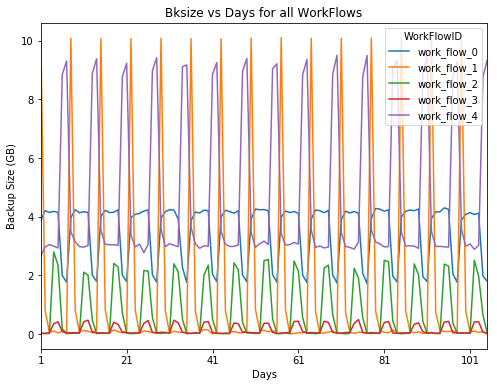

In [4]:
# Extract first 105 days
dailydata50 = dailydataQ1.loc[1:105,:]
# plot
dailydata50.unstack('WorkFlowID').plot(figsize=[8,6],legend=True,xticks=np.arange(1,106,20))
plt.title('Bksize vs Days for all WorkFlows')
plt.ylabel('Backup Size (GB)')

### (c) Identify repeating patterns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AFAFED358>,
      dtype=object)

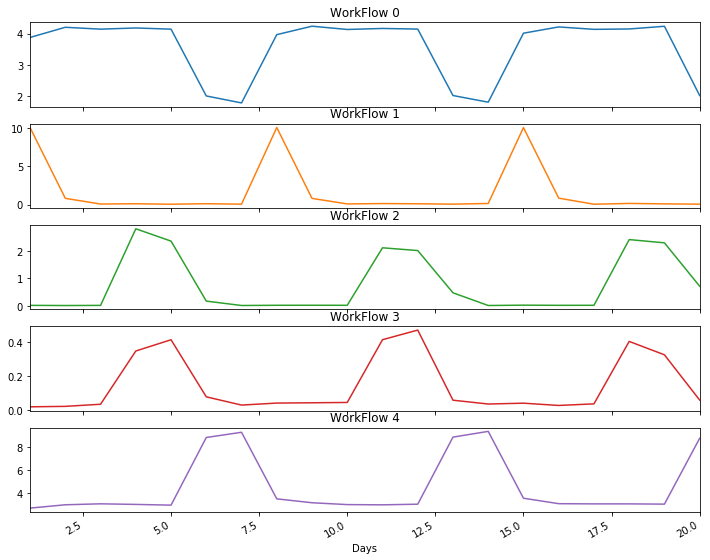

In [5]:
# plot for 20
dailydata20.unstack('WorkFlowID').plot(figsize=[12,10],legend=False,subplots=True,
                                      title=['WorkFlow 0','WorkFlow 1','WorkFlow 2',
                                             'WorkFlow 3','WorkFlow 4'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026AFAFED4E0>,
      dtype=object)

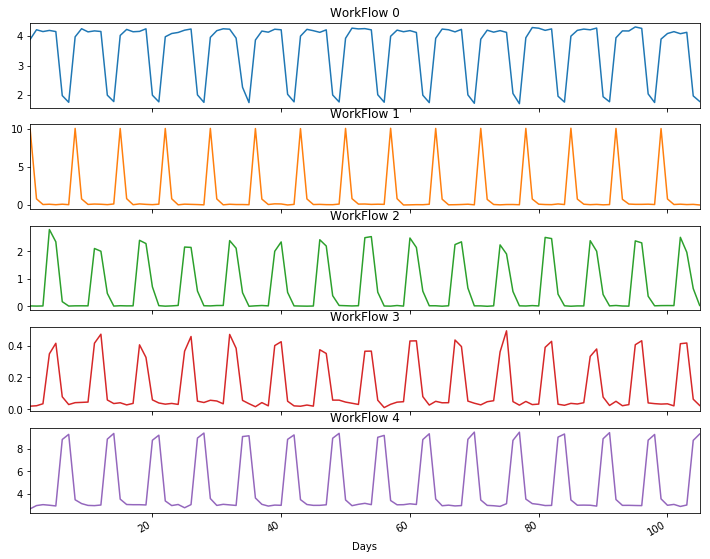

In [6]:
# plot for 105
dailydata50.unstack('WorkFlowID').plot(figsize=[12,10],legend=False,subplots=True,
                                      title=['WorkFlow 0','WorkFlow 1','WorkFlow 2',
                                             'WorkFlow 3','WorkFlow 4'])

#### Compare for 20 day-period

Text(0, 0.5, 'Backup Size (GB)')

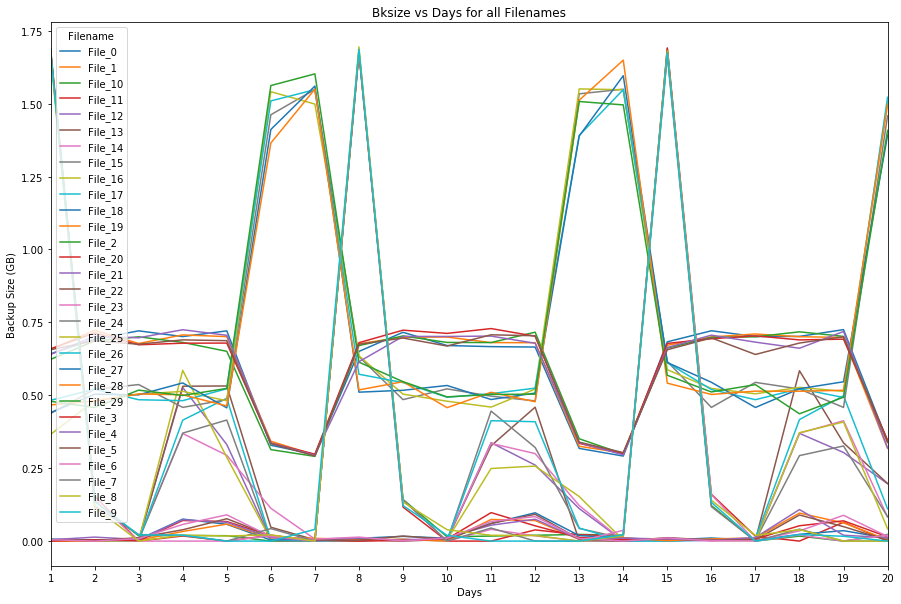

In [7]:
# Compare for 20 day-period
# Filter the data with only three columns
dailydata_short = dailydata.filter(items=['Filename','BKsize','Days'])
# Regroup by Days and WorkFlowID with sum of BKsize
dailydata_short = dailydata_short.groupby(['Days','Filename'])['BKsize'].sum()
# Extract first 20 days
dailydata20 = dailydata_short.loc[1:20,:]
# plot
dailydata20.unstack('Filename').plot(figsize=[15,10],legend=True,xticks=np.arange(1,21))
plt.title('Bksize vs Days for all Filenames')
plt.ylabel('Backup Size (GB)')

#### Compare for 105 day-period

Text(0, 0.5, 'Backup Size (GB)')

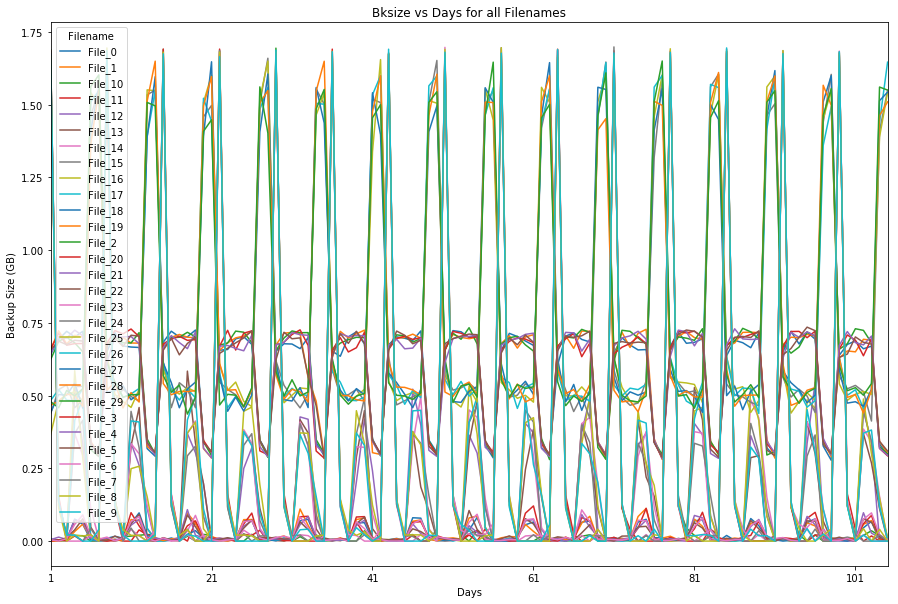

In [8]:
# Compare for 105 day-period
# Filter the data with only three columns
dailydata_short = dailydata.filter(items=['Filename','BKsize','Days'])
# Regroup by Days and WorkFlowID with sum of BKsize
dailydata_short = dailydata_short.groupby(['Days','Filename'])['BKsize'].sum()
# Extract first 20 days
dailydata20 = dailydata_short.loc[1:105,:]
# plot
dailydata20.unstack('Filename').plot(figsize=[15,10],legend=True,xticks=np.arange(1,106,20))
plt.title('Bksize vs Days for all Filenames')
plt.ylabel('Backup Size (GB)')

## Question 2 Predict the backup size

In [3]:
# Reform the dataset for Q2
dailydatasetQ2 = dailydata.drop(columns=['BKtime'])
#print(dailydatasetQ2)

#### Scalar encoding for each catagorical variable

In [4]:
# Scalar encoding for each catagorical variable
# NOTE: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

# For Day of the Week
WeekDay_label, WeekDay_unique = pd.factorize(dailydatasetQ2['WeekDay'],sort=True)
# For Hour of the Day
# 1=0; 5=1; 9=2; 13=3; 17=4; 21=5
BKStime_label, BKStime_unique = pd.factorize(dailydatasetQ2['BKStime'],sort=True)
# For WorkFlowID
# work_flow_0=0; work_flow_1=1; work_flow_2=2; work_flow_3=3; work_flow_4=4
WorkFlowID_label, WorkFlowID_unique = pd.factorize(dailydatasetQ2['WorkFlowID'],sort=True)
# For Filename
# NOTE: the order of File_0 to File_29 is out of order. ie: File_0 != 0
Filename_label, Filename_unique = pd.factorize(dailydatasetQ2['Filename'],sort=True)
# For Week Number
Weeknum_label, Weeknum_unique = pd.factorize(dailydatasetQ2['Week#'],sort=True)

# Create Scalar encoded dataset (All coding start with 1)
dailydatasetQ2_scalar = dailydatasetQ2.copy()
dailydatasetQ2_scalar['WeekDay'] = WeekDay_label+1
dailydatasetQ2_scalar['BKStime'] = BKStime_label+1
dailydatasetQ2_scalar['WorkFlowID'] = WorkFlowID_label+1
dailydatasetQ2_scalar['Filename'] = Filename_label+1
dailydatasetQ2_scalar['Week#'] = Weeknum_label+1

#print(dailydatasetQ2_scalar)

#### Scatter plot function

In [5]:
def plotPred(test_target, pred_target):
    line1 = np.linspace(0,np.max([test_target,pred_target]),10)
    line2 = np.linspace(np.min(pred_target),np.max(pred_target),10)
    
    plt.figure(figsize=(8,6)) 
    plt.scatter(test_target,pred_target)
    plt.plot(line1, line1,'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # residuals
    plt.figure(figsize=(8,6))
    residual = np.array(test_target) - np.array(pred_target)
    plt.scatter(pred_target,residual)
    plt.plot(line2, np.linspace(0,0,10),'r--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual")
    plt.show()

### (a) Linear regression model

RMSE of training dataset:  0.1023484545336009
RMSE of testing dataset:  0.10244339396544004


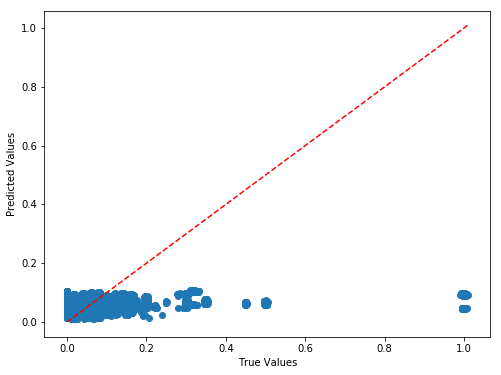

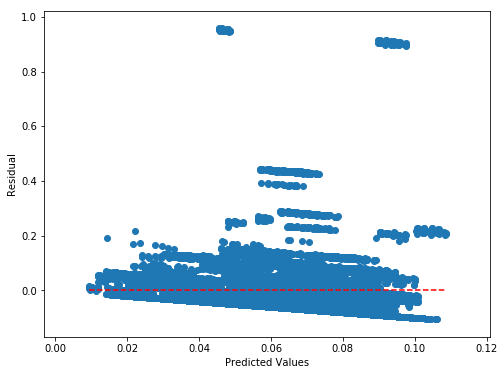

In [12]:
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# define X,y
X = dailydatasetQ2_scalar[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
y = dailydatasetQ2['BKsize']
# Linear Regression
reg = LinearRegression()

# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(reg, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))
print('RMSE of training dataset: ', train_score)
print('RMSE of testing dataset: ', test_score)

# Plot scatter
plotPred(y,predict)


### (b) Random importance forest regression model

#### (i) RandomForestRegressor

In [13]:
# i)For RandomForestRegressor
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
# define X,y
X = dailydatasetQ2_scalar[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
y = dailydatasetQ2['BKsize']
# Random forest Regression
regr = RandomForestRegressor(n_estimators=20, max_depth=4,
                              bootstrap=True, max_features=5, oob_score=True)
# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(regr, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True, return_estimator=True)
test_score = np.sqrt(np.sum(-scores['test_score'])/len(scores['test_score']))
train_score = np.sqrt(np.sum(-scores['train_score'])/len(scores['test_score']))

E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [14]:
# Reports
print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', test_score)
print('oob error: ', 1-scores['estimator'][8].oob_score_)

RMSE of training dateset:  0.060394262011897806
RMSE of testing dateset:  0.06053919513316029
oob error:  0.3364502768032185


#### (ii) sweep number of trees and maximum number of features

In [15]:
# ii) sweep number of trees and maximum number of features
num_trees = np.arange(1,201)
max_features = np.arange(1,6) 
test_list = []
oob_list = []
for f in max_features:
    test_score_hist = []
    oob_error_hist = []
    print('max_features: ',f)
    for t in num_trees:
        regr = RandomForestRegressor(n_estimators=t, max_depth = 4,
                                      bootstrap=True, max_features=f, oob_score=True)
        # 10-fold cross validation for scalar encoding dataset
        scores = cross_validate(regr, X, y, scoring='neg_mean_squared_error',
                                cv=10, return_train_score=True, return_estimator=True)
        test_score = np.sqrt(np.sum(-scores['test_score'])/len(scores['test_score']))
        test_score_hist.append(test_score)
        
        # OOB ERROR
        oob_error = 1-scores['estimator'][8].oob_score_
        oob_error_hist.append(oob_error)
    
    test_list.append(test_score_hist)
    oob_list.append(oob_error_hist)
        

E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


max_features:  1


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


max_features:  2


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


max_features:  3


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


max_features:  4


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


max_features:  5


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


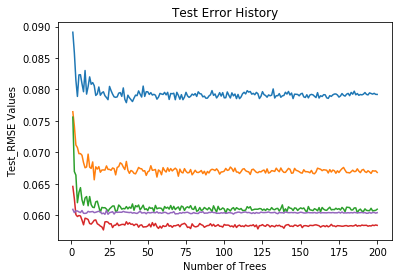

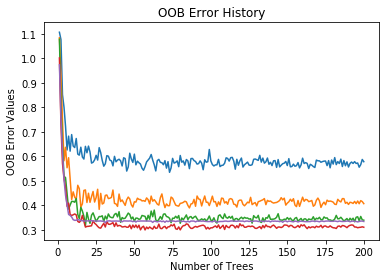

In [16]:
import matplotlib.pyplot as plt
# Test Error History
for f in max_features:
    plt.plot(num_trees, test_list[f-1], label=f)
plt.title('Test Error History')
plt.xlabel('Number of Trees')
plt.ylabel('Test_RMSE Values')
plt.show()
# OOB Error History
for f in max_features:
    plt.plot(num_trees, oob_list[f-1], label=f)
plt.title('OOB Error History')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Values')
plt.show()
# max_feature = 4, num of trees = 25

#### (iii) Another parameter to achieve the best performance

In [17]:
# Test on Maxdepth
max_depth = np.arange(1,31)
test_score_hist = []
oob_error_hist = []
for d in max_depth:
    print('maximum depth: ',d)
    regr = RandomForestRegressor(n_estimators=20, max_depth = d,
                                  bootstrap=True, max_features=5, oob_score=True)
    # 10-fold cross validation for scalar encoding dataset
    scores = cross_validate(regr, X, y, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=True, return_estimator=True)
    test_score = np.sqrt(np.sum(-scores['test_score'])/len(scores['test_score']))
    test_score_hist.append(test_score)
    # OOB ERROR
    oob_error = 1-scores['estimator'][8].oob_score_
    oob_error_hist.append(oob_error)

maximum depth:  1


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  2


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  3


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  4


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  5


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  6


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  7


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  8


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  9


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  10


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  11


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  12


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  13


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  14


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  15


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  16


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  17


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  18


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  19


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  20


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  21


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  22


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  23


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  24


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  25


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  26


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  27


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  28


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  29


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


maximum depth:  30


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


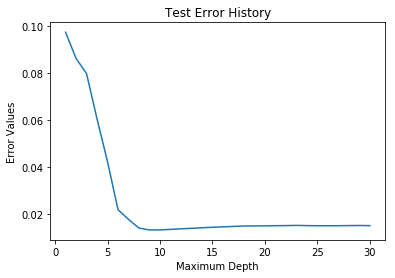

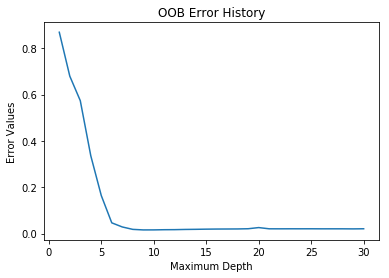

In [18]:
import matplotlib.pyplot as plt
# Test Error History
plt.plot(max_depth, test_score_hist)
plt.title('Test Error History')
plt.xlabel('Maximum Depth')
plt.ylabel('Error Values')
plt.show()
# OOB Error History
plt.plot(max_depth, oob_error_hist)
plt.title('OOB Error History')
plt.xlabel('Maximum Depth')
plt.ylabel('Error Values')
plt.show()
# max depth = 10

#### (iv) Report the best model

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
# define X,y
X = dailydatasetQ2_scalar[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
y = dailydatasetQ2['BKsize']
# the best combo: 
num_trees = 25 
max_features = 4
max_depth = 10
# RandomForestRegressor
regr = RandomForestRegressor(n_estimators=num_trees, max_depth = max_depth,
                                  bootstrap=True, max_features=max_features, oob_score=True)
# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(regr, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True, return_estimator=True)
predict = cross_val_predict(regr, X, y, cv=10)
test_score = np.sqrt(np.sum(-scores['test_score'])/len(scores['test_score']))
train_score = np.sqrt(np.sum(-scores['train_score'])/len(scores['test_score']))


E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RMSE of training dateset:  0.011212220303951517
RMSE of testing dateset:  0.013038873931715572
oob error:  0.016109622634196907
Feature importance:
 [0.00327133 0.24156424 0.36652833 0.30654358 0.08209253]
 [Week#      WeekDay    BKStime    WorkFlowID Filename  ]


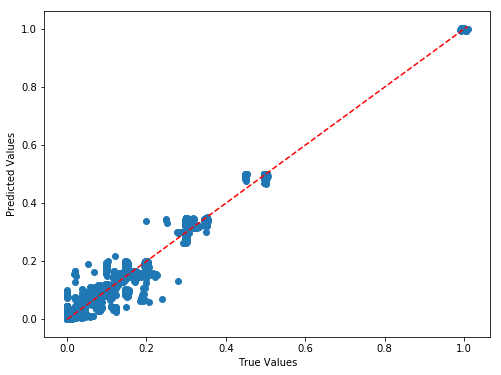

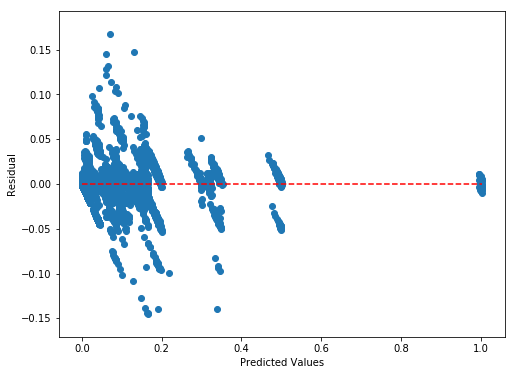

In [20]:
# Reports
print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', test_score)
print('oob error: ', 1-scores['estimator'][8].oob_score_)
print('Feature importance:\n',scores['estimator'][8].feature_importances_)
print(' [Week#','     WeekDay','   BKStime','   WorkFlowID','Filename  ]')
# plot
plotPred(y,predict)


#### (v) Visualize decision trees

In [21]:
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from graphviz import Source
# NOTE: Need to install graphviz (conda install python-graphviz)
# the best combo: 
num_trees = 25 
max_features = 4
max_depth = 4
# RandomForestRegressor
regr = RandomForestRegressor(n_estimators=num_trees, max_depth = max_depth,
                                  bootstrap=True, max_features=max_features, oob_score=True)
# define X,y
X = dailydatasetQ2_scalar[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
y = dailydatasetQ2['BKsize']
# 10-fold cross validation
scores = cross_validate(regr, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True, return_estimator=True)
# Decision tree
tree_data = export_graphviz(scores['estimator'][8].estimators_[8])
# For output decision tree file only
#graph = Source(tree_data)
#graph.view()
# Feature importance
print('Feature importance:\n',scores['estimator'][8].feature_importances_)
print(' [Week#','      WeekDay','   BKStime','   WorkFlowID','Filename  ]')

E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Feature importance:
 [1.23986887e-04 3.35537131e-01 1.33026467e-01 4.38649702e-01
 9.26627124e-02]
 [Week#       WeekDay    BKStime    WorkFlowID Filename  ]


### (c) Neural Network Regression Model with one-hot encoded

#### One hot encoding

In [22]:
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder
# Create dataset for one hot encoding
enc = OneHotEncoder()
dailydatasetQ2_onehot = enc.fit_transform(
    dailydatasetQ2[['Week#','WeekDay','BKStime','WorkFlowID','Filename']])
#print(dailydatasetQ2_onehot)

In [23]:
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
# Define parameters
activations = ['relu', 'logistic', 'tanh']
num_hidden = [2,5,10]
num_hidden.extend(np.arange(50,601,50))

# define X,y
X = dailydatasetQ2_onehot
y = dailydatasetQ2['BKsize']

# ML regression
test_list = []
for a in activations:
    print('activation: ',a)
    test_score_hist = []
    for h in num_hidden:
        regml = MLPRegressor(activation= a,hidden_layer_sizes=h)
        # 10-fold cross validation for scalar encoding dataset
        scores = cross_validate(regml, X, y, scoring='neg_mean_squared_error',
                                cv=10, return_train_score=True, return_estimator=True)
        test_score = np.sqrt(np.mean(-scores['test_score']))
        test_score_hist.append(test_score)
    test_list.append(test_score_hist)

activation:  relu
activation:  logistic
activation:  tanh


Minimum Test-RMSE for relu 600
Minimum Test-RMSE for logistic 50
Minimum Test-RMSE for tanh 500


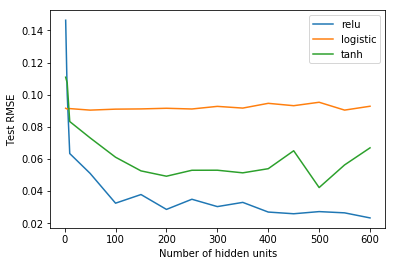

In [24]:
# Plot
for a in activations:
    min_RMSE = np.min(test_list[activations.index(a)])
    index_min_RMSE = test_list[activations.index(a)].index(min_RMSE)
    print('Minimum Test-RMSE for',a, num_hidden[index_min_RMSE])
    plt.plot(num_hidden, test_list[activations.index(a)], label=a)
plt.xlabel("Number of hidden units")
plt.ylabel("Test RMSE")
plt.legend()
plt.show()

#### Report for Part c

In [25]:
from sklearn.model_selection import cross_validate, cross_val_predict
# plot scatter for best parameter
best_activation = 'relu'
best_h = 550

# define X,y
X = dailydatasetQ2_onehot
y = dailydatasetQ2['BKsize']

# MLP Regressiona
regml = MLPRegressor(activation=best_activation, hidden_layer_sizes=best_h)
# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(regml, X, y, scoring='neg_mean_squared_error',
                    cv=10, return_train_score=True, return_estimator=True)
predict = cross_val_predict(regml, X, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
test_score_hist.append(test_score)

RMSE of training dateset:  0.011212220303951517
RMSE of testing dateset:  0.027297781956285846


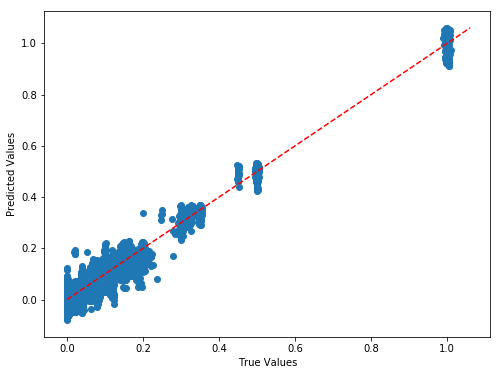

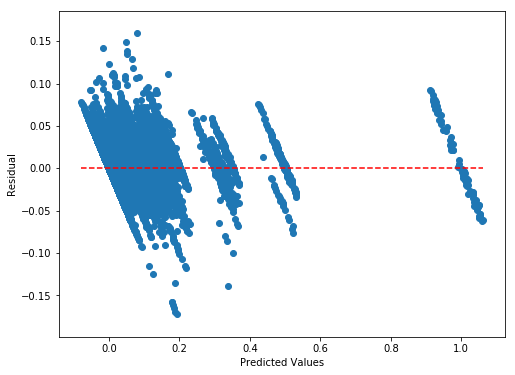

In [26]:
# Report and plot
print('RMSE of training dateset: ', train_score)
print('RMSE of testing dateset: ', test_score)
plotPred(y,predict)

### (d) Predict the Backup size for each of the workflows separately

In [6]:
# Create dataset grouped by workflowID using scalar encoded dataset
dailydatasetQ2_workflow = dailydatasetQ2_scalar.groupby('WorkFlowID')

#### (i) Using linear regression model.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

for workflowname, workflowdata in dailydatasetQ2_workflow:
    pd.DataFrame.reset_index(workflowdata, inplace = True)
    print('WorkflowID_', workflowname-1)
    
    # define X,y
    X = workflowdata[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
    y = workflowdata['BKsize']

    # Linear Regression
    reg = LinearRegression()

    # 10-fold cross validation for dataset
    scores = cross_validate(reg, X, y, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=True)
    predict = cross_val_predict(reg, X, y, cv=10)
    test_score = np.sqrt(np.mean(-scores['test_score']))
    train_score = np.sqrt(np.mean(-scores['train_score']))
    
    # Report
    print('RMSE of training dataset: ', train_score)
    print('RMSE of testing dataset: ', test_score)

WorkflowID_ 0
RMSE of training dataset:  0.03583561171077216
RMSE of testing dataset:  0.035886959976491405
WorkflowID_ 1
RMSE of training dataset:  0.14876606473815918
RMSE of testing dataset:  0.14891860515762562
WorkflowID_ 2
RMSE of training dataset:  0.042909320605460696
RMSE of testing dataset:  0.0430669058147329
WorkflowID_ 3
RMSE of training dataset:  0.007243878638778295
RMSE of testing dataset:  0.00726092447251685
WorkflowID_ 4
RMSE of training dataset:  0.08592193679488369
RMSE of testing dataset:  0.08599061411716571


#### (ii) Fitting more complex regression function

In [8]:
# NOTE: 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

train_workflow = []
test_workflow = []
for workflowname, workflowdata in dailydatasetQ2_workflow:
    pd.DataFrame.reset_index(workflowdata, inplace=True)
    print('WorkflowID_', workflowname-1)
    # KFold
    kf = KFold(n_splits=10)
    # define X,y
    X = workflowdata[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
    y = workflowdata['BKsize']
    
    test_list = []
    train_list = []
    for d in np.arange(1,11):
        # 10 cross-validation for dataset usign Kfold
        train_hist = []
        test_hist = []
        for train_index, test_index in kf.split(workflowdata):
            # Polynomial Features
            poly = PolynomialFeatures(degree = d)
            # k-fold X,y
            X_train, X_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = y[train_index], y[test_index]
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            # Linear Regression
            reg = LinearRegression()
            reg.fit(X_train_poly,y_train)
            # predict
            predict_train = reg.predict(X_train_poly)
            predict_test = reg.predict(X_test_poly)
            # RMSE
            train_score = np.mean(np.square(y_train-predict_train))
            test_score = np.mean(np.square(y_test-predict_test))
            train_hist.append(train_score)
            test_hist.append(test_score)
        train_list.extend([np.sqrt(np.mean(train_hist))])
        test_list.extend([np.sqrt(np.mean(test_hist))])
    train_workflow.append(train_list)
    test_workflow.append(test_list)

WorkflowID_ 0
WorkflowID_ 1
WorkflowID_ 2
WorkflowID_ 3
WorkflowID_ 4


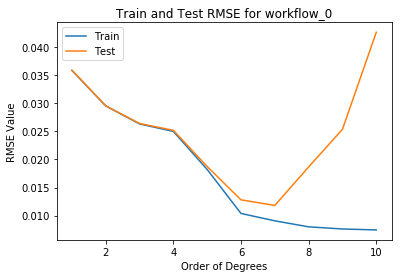

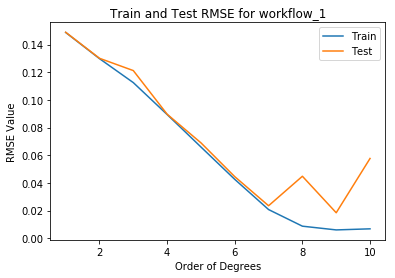

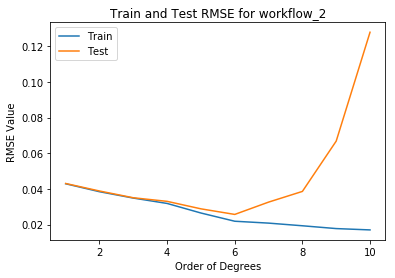

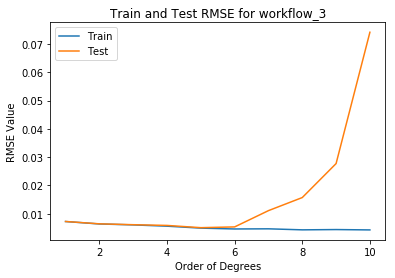

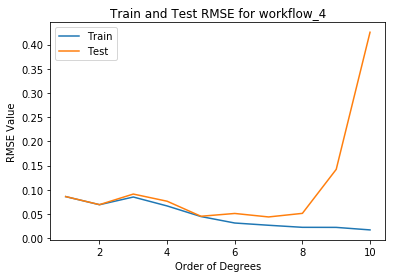

In [9]:
# Plot
for wf in np.arange(5):
    plt.plot(np.arange(1,11), train_workflow[wf], label='Train')
    plt.plot(np.arange(1,11), test_workflow[wf], label='Test')
    plt.title('Train and Test RMSE for workflow_'+str(wf))
    plt.xlabel('Order of Degrees')
    plt.ylabel('RMSE Value')
    plt.legend()
    plt.show()

#### Report for Part d

Workflow_ 0
RMSE of training dateset:  0.009074343539536319
RMSE of testing dateset:  0.011815482926021137


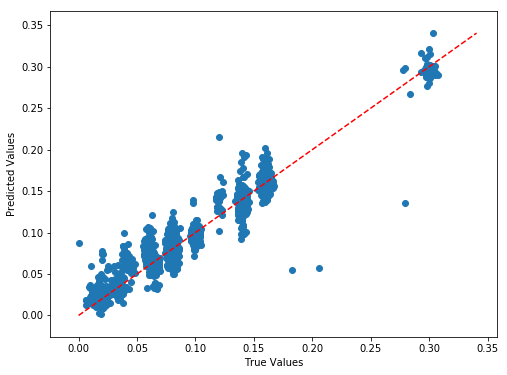

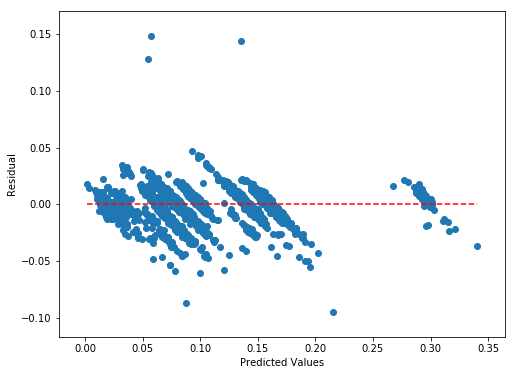

Workflow_ 1
RMSE of training dateset:  0.020777397051038298
RMSE of testing dateset:  0.02353728707038763


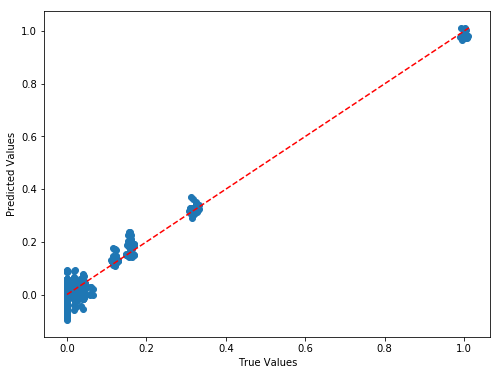

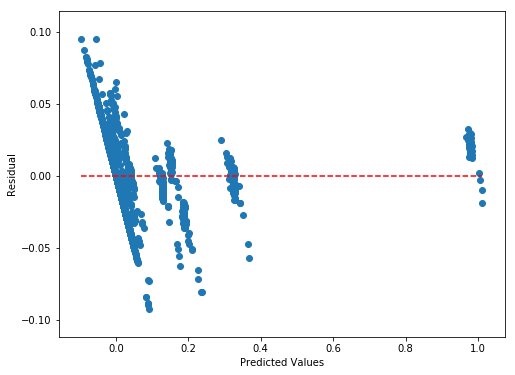

Workflow_ 2
RMSE of training dateset:  0.020860227425543693
RMSE of testing dateset:  0.032629800607391735


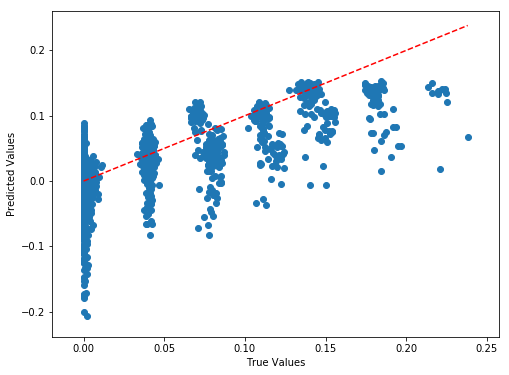

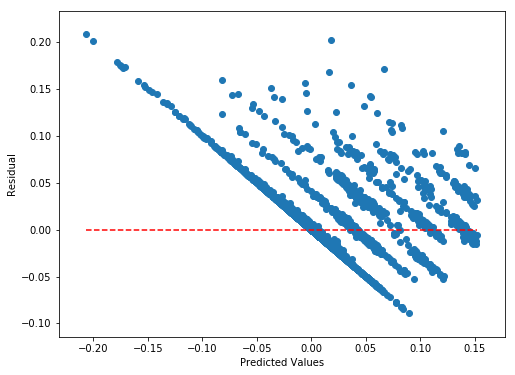

Workflow_ 3
RMSE of training dateset:  0.004663816055340966
RMSE of testing dateset:  0.01109673596685999


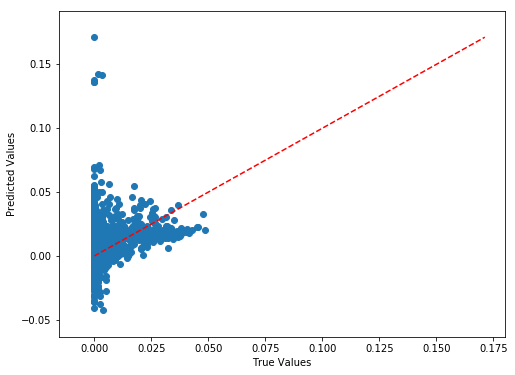

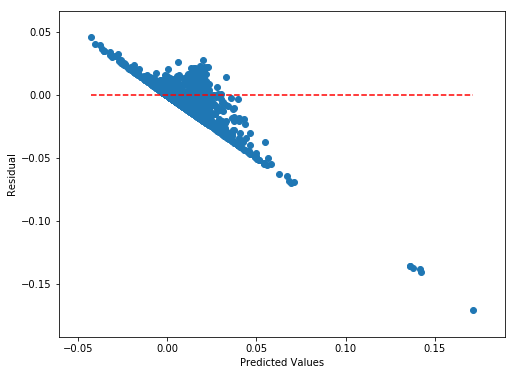

Workflow_ 4
RMSE of training dateset:  0.026765758327213
RMSE of testing dateset:  0.043928457702082035


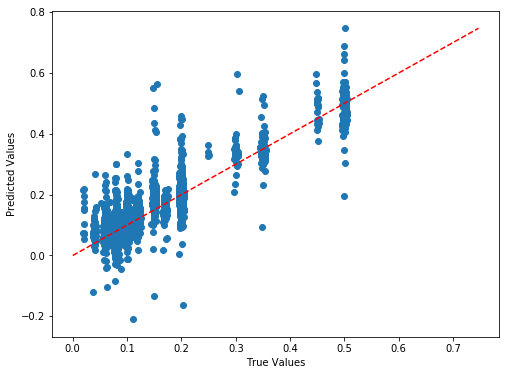

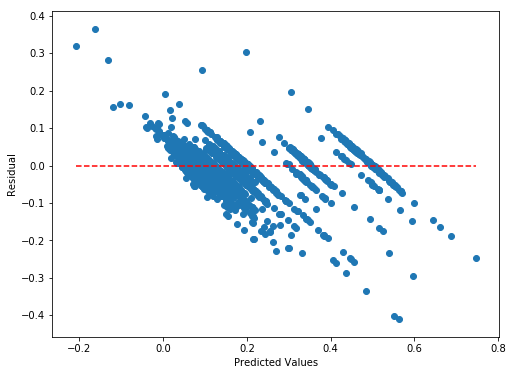

In [10]:
# Report 
for workflowname, workflowdata in dailydatasetQ2_workflow:
    test_hist = []
    train_hist = []
    y_test_fitted = []
    predict_test_fitted = []
    pd.DataFrame.reset_index(workflowdata, inplace=True)
    print('Workflow_', workflowname-1)
    # KFold
    kf = KFold(n_splits=10)
    # define X,y
    X = workflowdata[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
    y = workflowdata['BKsize']

    # 10 cross-validation for dataset usign Kfold
    for train_index, test_index in kf.split(workflowdata):
        # Polynomial Features
        poly = PolynomialFeatures(degree = 7)
        # k-fold X,y
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        # Linear Regression
        reg = LinearRegression()
        reg.fit(X_train_poly,y_train)
        # predict
        predict_train = reg.predict(X_train_poly)
        predict_test = reg.predict(X_test_poly)
        # RMSE
        train_score = np.mean(np.square(y_train-predict_train))
        test_score = np.mean(np.square(y_test-predict_test))
        train_hist.append(train_score)
        test_hist.append(test_score)
        # Fitted
        y_test_fitted.extend(y_test)
        predict_test_fitted.extend(predict_test)
    
    # report
    print('RMSE of training dateset: ', np.sqrt(np.mean(train_hist)))
    print('RMSE of testing dateset: ', np.sqrt(np.mean(test_hist)))
    plotPred(y_test_fitted,predict_test_fitted)


### (e) Use knn regression

In [32]:
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
# sweep parameter k to optimize
k_values = np.arange(2,50)
test_hist = []
train_hist = []
for k in k_values:
    # define X,y
    X = dailydatasetQ2_scalar[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
    y = dailydatasetQ2['BKsize']
    
    # KNN Regression
    neigh = KNeighborsRegressor(n_neighbors = k)

    # 10-fold cross validation for dataset
    scores = cross_validate(neigh, X, y, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=True)
    test_score = np.sqrt(np.mean(-scores['test_score']))
    train_score = np.sqrt(np.mean(-scores['train_score']))
    test_hist.append(test_score)
    train_hist.append(train_score) 

0.03665152779225391
Best k value:  2
RMSE of training dataset:  0.06622091920622311
RMSE of testing dataset:  0.06814549721215396


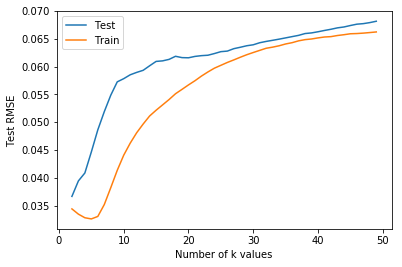

In [33]:
# Report
print('Best k value: ', test_hist.index(np.min(test_hist))+2)
print('RMSE of training dataset: ', train_score)
print('RMSE of testing dataset: ', test_score)
# plot
plt.plot(k_values, test_hist, label='Test')
plt.plot(k_values, train_hist, label='Train')
plt.xlabel("Number of k values")
plt.ylabel("Test RMSE")
plt.legend()
plt.show()

#### Report for best KNN regression

RMSE of training dateset:  0.03665152779225391
RMSE of testing dateset:  0.034401881832767135


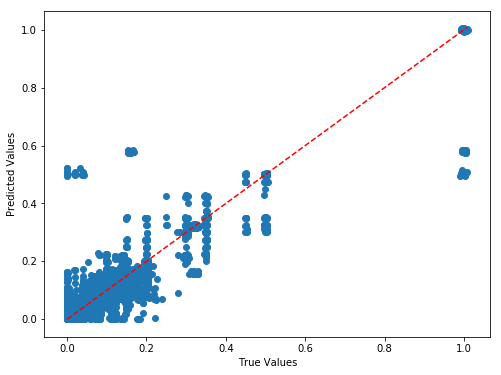

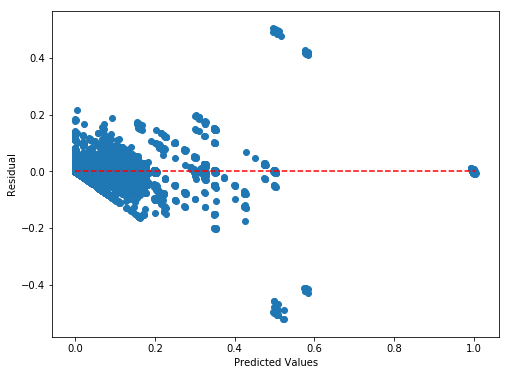

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# optimlized k
best_k = 2

# define X,y
X = dailydatasetQ2_scalar[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
y = dailydatasetQ2_scalar['BKsize']

# KNN Regression
neigh = KNeighborsRegressor(n_neighbors = best_k)

# 10-fold cross validation for dataset
scores = cross_validate(neigh, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(neigh, X, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))

# report
print('RMSE of training dateset: ', test_score)
print('RMSE of testing dateset: ', train_score)
plotPred(y,predict) 

## Question 3: Compare Regression models

In [35]:
# NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder
# Create dataset for one hot encoding
enc = OneHotEncoder()
dailydatasetQ2_onehot = enc.fit_transform(
    dailydatasetQ2[['Week#','WeekDay','BKStime','WorkFlowID','Filename']])
#print(dailydatasetQ2_onehot)

#### Part a: Linear Regression using one hot

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# define X,y
X = dailydatasetQ2_onehot
y = dailydatasetQ2['BKsize']
# Linear Regression
reg = LinearRegression()

# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(reg, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(reg, X, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))
print('RMSE of training dataset: ', train_score)
print('RMSE of testing dataset: ', test_score)

RMSE of training dataset:  0.0883346513459427
RMSE of testing dataset:  0.09162623319025663


#### Part b: Random Forest Regression using one hot

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
# define X,y
X = dailydatasetQ2_onehot
y = dailydatasetQ2['BKsize']
# the best combo: 
num_trees = 25 
max_features = 4
max_depth = 10
# RandomForestRegressor
regr = RandomForestRegressor(n_estimators=num_trees, max_depth = max_depth,
                                  bootstrap=True, max_features=max_features, oob_score=True)
# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(regr, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True, return_estimator=True)
predict = cross_val_predict(regr, X, y, cv=10)
test_score = np.sqrt(np.sum(-scores['test_score'])/len(scores['test_score']))
train_score = np.sqrt(np.sum(-scores['train_score'])/len(scores['test_score']))
print('RMSE of training dataset: ', train_score)
print('RMSE of testing dataset: ', test_score)
print('oob error: ', 1-scores['estimator'][8].oob_score_)

E:\anaconda\envs\UCLA\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RMSE of training dataset:  0.07369904831116185
RMSE of testing dataset:  0.07487794404521232
oob error:  0.5155134971133876


#### Part c: Neural Network Regression using scalar

In [38]:
from sklearn.model_selection import cross_validate, cross_val_predict
# plot scatter for best parameter
best_activation = 'relu'
best_h = 550

# define X,y
X = dailydatasetQ2_scalar[['Week#','WeekDay','BKStime','WorkFlowID','Filename']]
y = dailydatasetQ2['BKsize']

# MLP Regressiona
regml = MLPRegressor(activation=best_activation, hidden_layer_sizes=best_h)
# 10-fold cross validation for scalar encoding dataset
scores = cross_validate(regml, X, y, scoring='neg_mean_squared_error',
                    cv=10, return_train_score=True, return_estimator=True)
predict = cross_val_predict(regml, X, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
test_score_hist.append(test_score)
print('RMSE of training dataset: ', train_score)
print('RMSE of testing dataset: ', test_score)

RMSE of training dataset:  0.07369904831116185
RMSE of testing dataset:  0.06787146275546399


#### Part d: Piecewose Linear Regression using one hot

In [39]:
pass

#### Part e: KNN Regression using one hot

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# optimlized k
best_k = 2

# define X,y
X = dailydatasetQ2_onehot
y = dailydatasetQ2_scalar['BKsize']

# KNN Regression
neigh = KNeighborsRegressor(n_neighbors = best_k)

# 10-fold cross validation for dataset
scores = cross_validate(neigh, X, y, scoring='neg_mean_squared_error',
                        cv=10, return_train_score=True)
predict = cross_val_predict(neigh, X, y, cv=10)
test_score = np.sqrt(np.mean(-scores['test_score']))
train_score = np.sqrt(np.mean(-scores['train_score']))

# report
print('RMSE of training dateset: ', test_score)
print('RMSE of testing dateset: ', train_score)

RMSE of training dateset:  0.03298319737501238
RMSE of testing dateset:  0.028754536976854272
